In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('restaurant_2024_full_dataset.csv')

In [ ]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

print("\nBasic statistics:")
display(df.describe())

Dataset shape: (3660, 16)

First few rows:


,date,restaurant_id,meal_id,day_of_week,month,season,is_weekend,demand,revenue,foot_traffic,temperature,precipitation,special_event,holiday,inventory_used,lead_time
0,2024-01-30,1,2,1,1,winter,0,42,556.12,285,6.0,3.83,0,0,45,1
1,2024-01-28,1,1,6,1,winter,1,43,465.66,427,-7.3,0.44,0,0,46,2
2,2024-01-15,1,10,0,1,winter,0,43,617.44,290,-7.9,1.10,0,0,47,2
3,2024-04-28,1,9,6,4,spring,1,35,387.85,414,9.8,1.98,0,0,38,2
4,2024-07-22,1,8,0,7,summer,0,44,435.46,272,29.8,2.97,0,0,45,1



Data types:


,0
date,object
restaurant_id,int64
meal_id,int64
day_of_week,int64
month,int64
season,object
is_weekend,int64
demand,int64
revenue,float64
foot_traffic,int64



Basic statistics:


,restaurant_id,meal_id,day_of_week,month,is_weekend,demand,revenue,foot_traffic,temperature,precipitation,special_event,holiday,inventory_used,lead_time
count,3660.0,3660.000000,3660.000000,3660.000000,3660.000000,3660.00000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,1.0,5.500000,2.986339,6.513661,0.284153,31.64918,345.989986,336.098361,11.744809,2.053060,0.092896,0.035519,34.121311,2.023224
std,0.0,2.872674,2.003640,3.451705,0.451072,11.99594,152.589043,100.217425,10.496023,1.998495,0.290327,0.185113,12.016570,0.825765
min,1.0,1.000000,0.000000,1.000000,0.000000,10.00000,71.180000,151.000000,-12.900000,0.000000,0.000000,0.000000,11.000000,1.000000
25%,1.0,3.000000,1.000000,4.000000,0.000000,22.00000,225.617500,259.000000,3.900000,0.660000,0.000000,0.000000,24.000000,1.000000
50%,1.0,5.500000,3.000000,7.000000,0.000000,32.00000,329.005000,339.000000,10.900000,1.470000,0.000000,0.000000,34.000000,2.000000
75%,1.0,8.000000,5.000000,10.000000,1.000000,41.00000,451.070000,415.000000,20.100000,2.810000,0.000000,0.000000,44.000000,3.000000
max,1.0,10.000000,6.000000,12.000000,1.000000,64.00000,908.700000,548.000000,37.500000,13.940000,1.000000,1.000000,67.000000,3.000000


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
display(missing_values)


Missing values per column:


,0
date,0
restaurant_id,0
meal_id,0
day_of_week,0
month,0
season,0
is_weekend,0
demand,0
revenue,0
foot_traffic,0


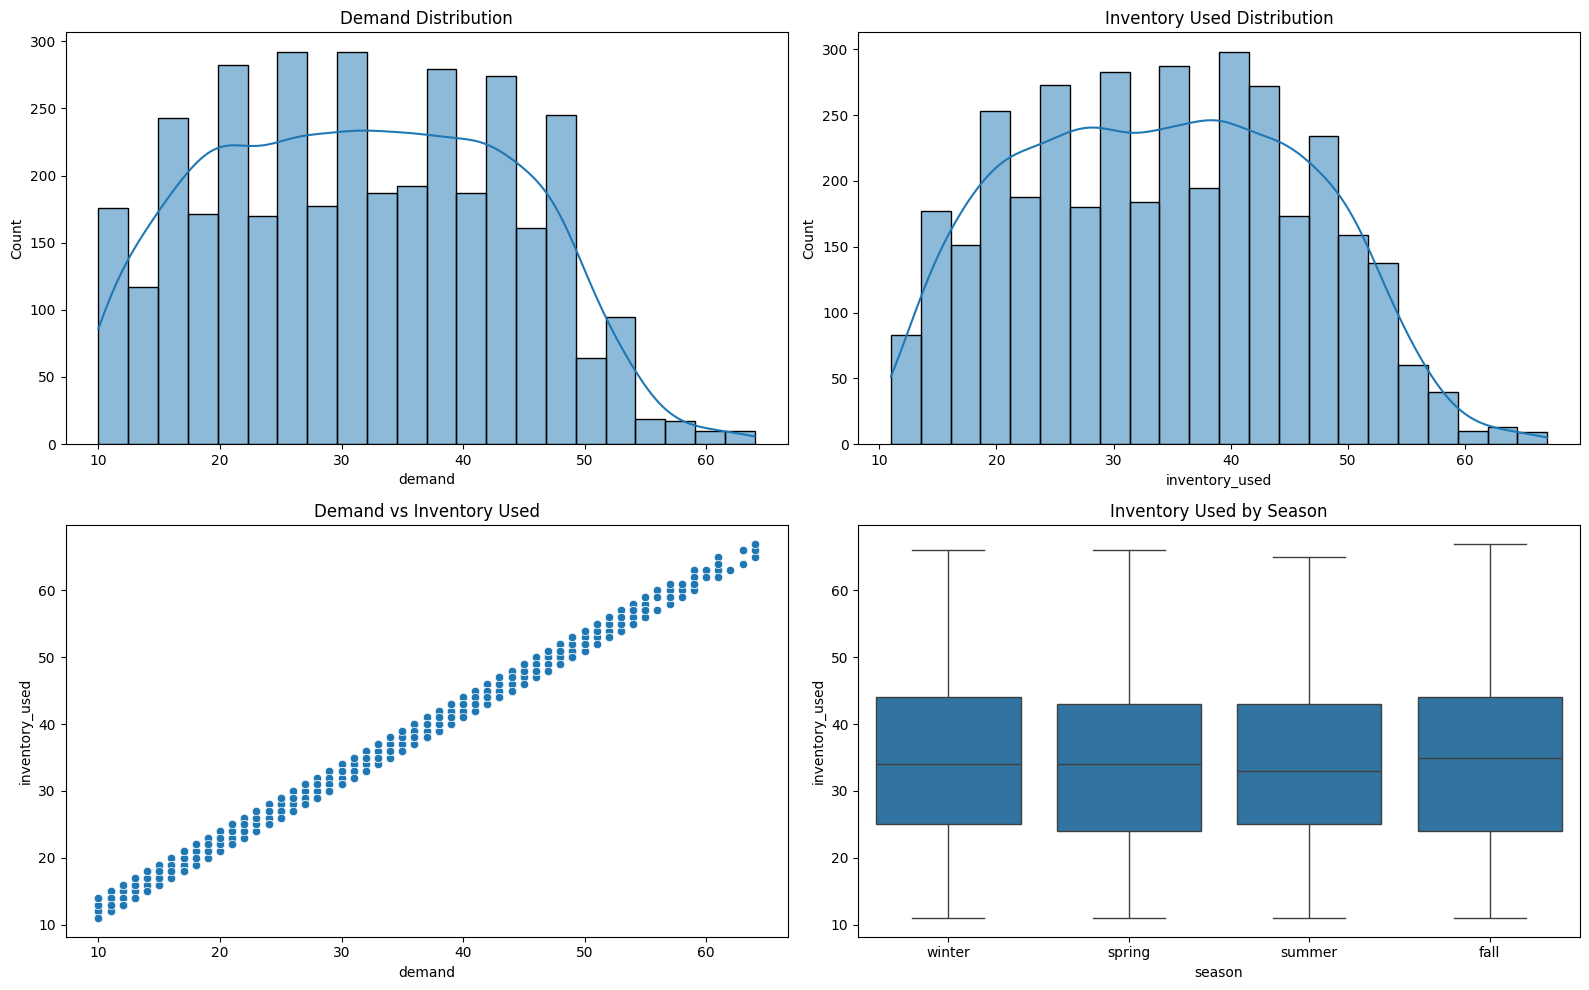

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['demand'], kde=True)
plt.title('Demand Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['inventory_used'], kde=True)
plt.title('Inventory Used Distribution')

plt.subplot(2, 2, 3)
sns.scatterplot(x='demand', y='inventory_used', data=df)
plt.title('Demand vs Inventory Used')

plt.subplot(2, 2, 4)
sns.boxplot(x='season', y='inventory_used', data=df)
plt.title('Inventory Used by Season')

plt.tight_layout()
plt.show()

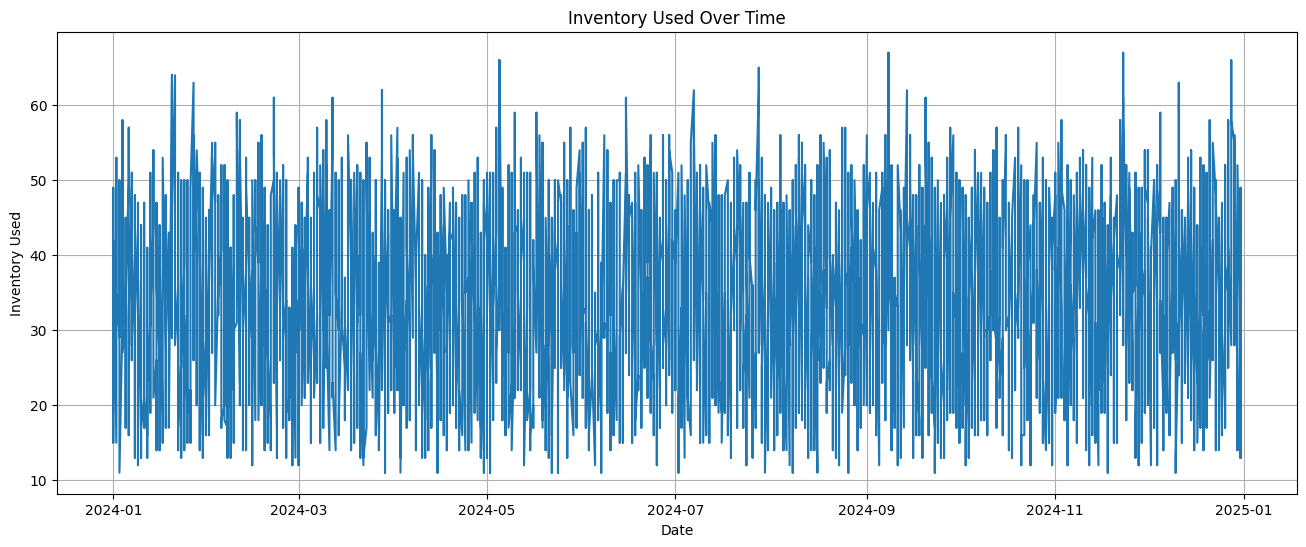

In [ ]:
# Time series visualization
plt.figure(figsize=(16, 6))
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Plot inventory used over time
plt.plot(df['date'], df['inventory_used'])
plt.title('Inventory Used Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Used')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import optuna

In [ ]:
feature_columns = ['demand', 'revenue', 'foot_traffic', 'temperature',
                  'precipitation', 'is_weekend', 'special_event',
                  'holiday', 'lead_time', 'day_of_week', 'month']

In [ ]:
df_encoded = pd.get_dummies(df, columns=['season'])

In [ ]:
X = df_encoded[feature_columns].values

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (2928, 11)
Validation set shape: (732, 11)


In [ ]:
def create_model(trial):
    # Define hyperparameters to optimize
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 8, 64)
    latent_dim = trial.suggest_int('latent_dim', 2, 10)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'selu', 'elu'])

    # Input layer
    input_dim = X_train.shape[1]
    inputs = Input(shape=(input_dim,))

    # Encoder
    x = inputs
    for i in range(n_layers):
        x = Dense(n_units // (2**i), activation=activation)(x)
        x = Dropout(dropout_rate)(x)

    # Bottleneck layer
    encoded = Dense(latent_dim, activation=activation)(x)

    # Decoder
    x = encoded
    for i in range(n_layers):
        x = Dense(n_units // (2**(n_layers-i-1)), activation=activation)(x)
        x = Dropout(dropout_rate)(x)

    # Output layer
    outputs = Dense(input_dim, activation='sigmoid')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error'
    )

    return model

In [ ]:
def objective(trial):
    # Create model with hyperparameters
    model = create_model(trial)

    # Define early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train model
    history = model.fit(
        X_train, X_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, X_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return validation loss
    return history.history['val_loss'][-1]

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

[I 2025-08-06 02:13:43,528] A new study created in memory with name: no-name-59f70481-5bf2-4a66-8644-18f39a89a0e1
[I 2025-08-06 02:14:21,024] Trial 0 finished with value: 0.009661054238677025 and parameters: {'n_layers': 1, 'n_units': 41, 'latent_dim': 4, 'dropout_rate': 0.034521731347048557, 'learning_rate': 0.0007129396491734443, 'activation': 'relu'}. Best is trial 0 with value: 0.009661054238677025.
[I 2025-08-06 02:15:00,731] Trial 1 finished with value: 0.05587459355592728 and parameters: {'n_layers': 3, 'n_units': 19, 'latent_dim': 10, 'dropout_rate': 0.37207059071461995, 'learning_rate': 0.0007681920780653777, 'activation': 'elu'}. Best is trial 0 with value: 0.009661054238677025.
[I 2025-08-06 02:15:33,593] Trial 2 finished with value: 0.005254711955785751 and parameters: {'n_layers': 1, 'n_units': 30, 'latent_dim': 9, 'dropout_rate': 0.4337085373038506, 'learning_rate': 0.0004952414449048636, 'activation': 'elu'}. Best is trial 2 with value: 0.005254711955785751.
[I 2025-08-0

Best trial:
  Value: 0.0004489549610298127
  Params: 
    n_layers: 1
    n_units: 57
    latent_dim: 10
    dropout_rate: 0.03155725995154513
    learning_rate: 0.00153944721547147
    activation: selu


In [ ]:
print(f"Number of completed trials: {len(study.trials)}")
print(f"Best value so far: {study.best_value}")

Number of completed trials: 50
Best value so far: 0.0004489549610298127


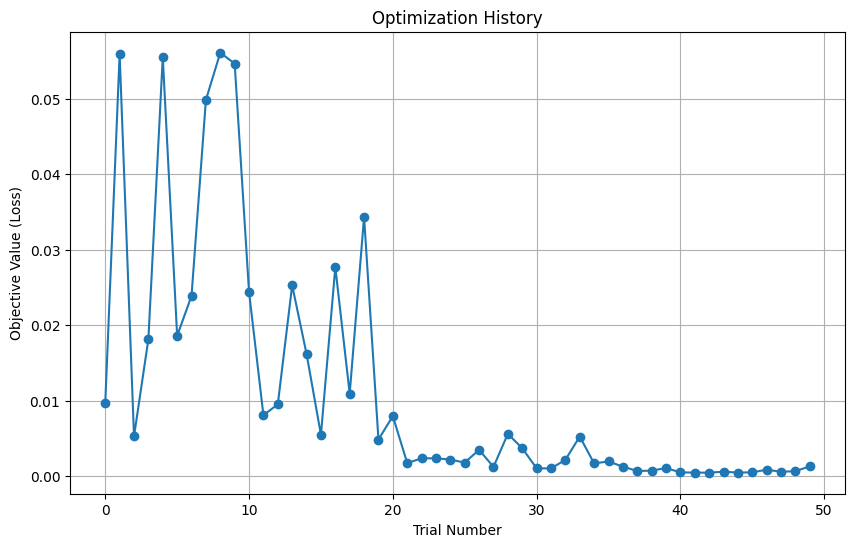

In [ ]:
trial_numbers = [t.number for t in study.trials]
values = [t.value for t in study.trials if t.value is not None]

plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, values, 'o-')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value (Loss)')
plt.title('Optimization History')
plt.grid(True)
plt.show()

In [ ]:
best_model = create_model(study.best_trial)

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train model
history = best_model.fit(
    X_train, X_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0911 - val_loss: 0.0270
Epoch 2/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 - val_loss: 0.0102
Epoch 3/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101 - val_loss: 0.0049
Epoch 4/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 5/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0022
Epoch 6/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 7/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 8/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 9/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 10/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 11/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 12/150
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

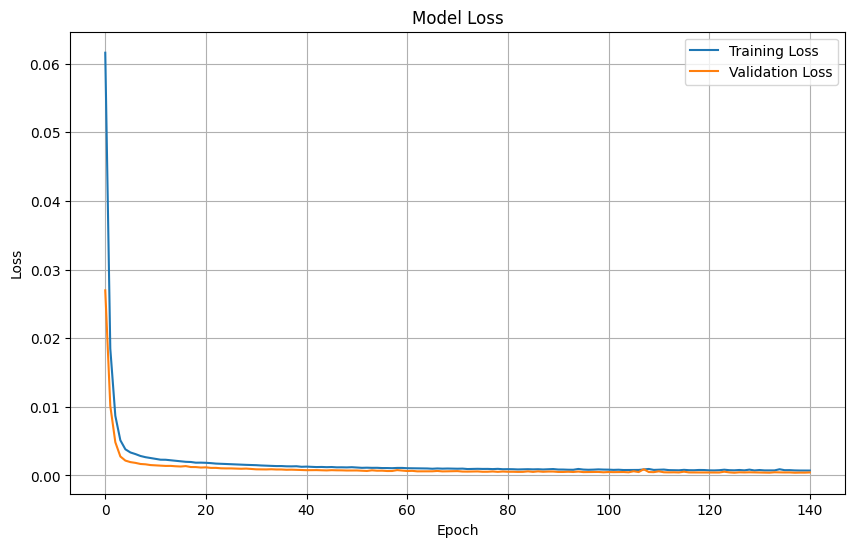

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_pred = best_model.predict(X_train)
train_mse = np.mean(np.power(X_train - train_pred, 2), axis=1)

threshold = np.percentile(train_mse, 95)
print(f"Anomaly threshold (95th percentile): {threshold:.6f}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Anomaly threshold (95th percentile): 0.000862


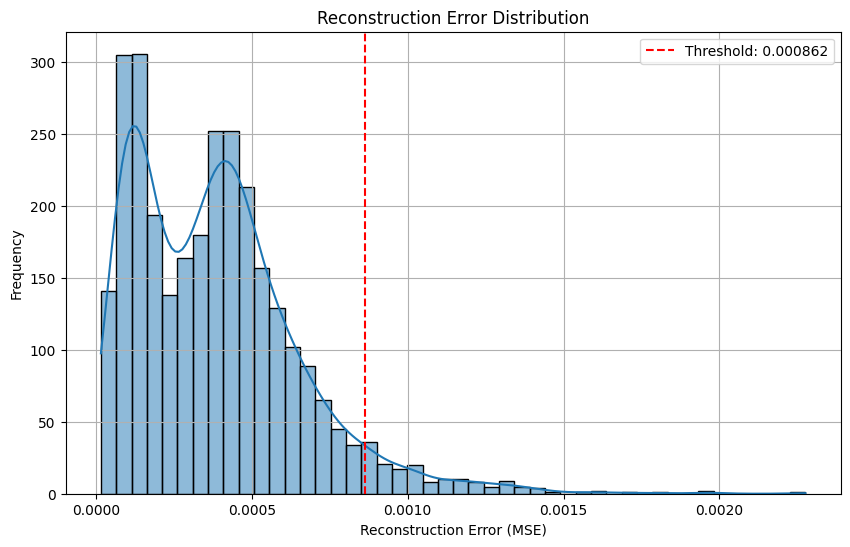

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train_mse, kde=True)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.6f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
full_pred = best_model.predict(X_scaled)
full_mse = np.mean(np.power(X_scaled - full_pred, 2), axis=1)

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
df['reconstruction_error'] = full_mse
df['is_anomaly'] = df['reconstruction_error'] > threshold

print(f"Number of anomalies detected: {df['is_anomaly'].sum()} out of {len(df)} records")
print(f"Anomaly percentage: {100 * df['is_anomaly'].sum() / len(df):.2f}%")

Number of anomalies detected: 192 out of 3660 records
Anomaly percentage: 5.25%


In [ ]:
print("Sample anomalies:")
anomalies = df[df['is_anomaly'] == True].sort_values('reconstruction_error', ascending=False)
display(anomalies[['date', 'restaurant_id', 'meal_id', 'demand', 'inventory_used', 'reconstruction_error']].head(10))

Sample anomalies:


,date,restaurant_id,meal_id,demand,inventory_used,reconstruction_error
3149,2024-11-23,1,9,63,66,0.002276
11,2024-07-28,1,4,61,64,0.002074
3471,2024-09-14,1,3,60,62,0.002073
2763,2024-01-21,1,5,61,64,0.001978
878,2024-12-11,1,8,59,63,0.001938
2900,2024-05-05,1,7,64,66,0.001792
3376,2024-09-08,1,2,64,67,0.001706
2292,2024-12-28,1,5,63,66,0.001616
1602,2024-01-09,1,6,11,12,0.001603
2265,2024-12-30,1,3,10,14,0.001541


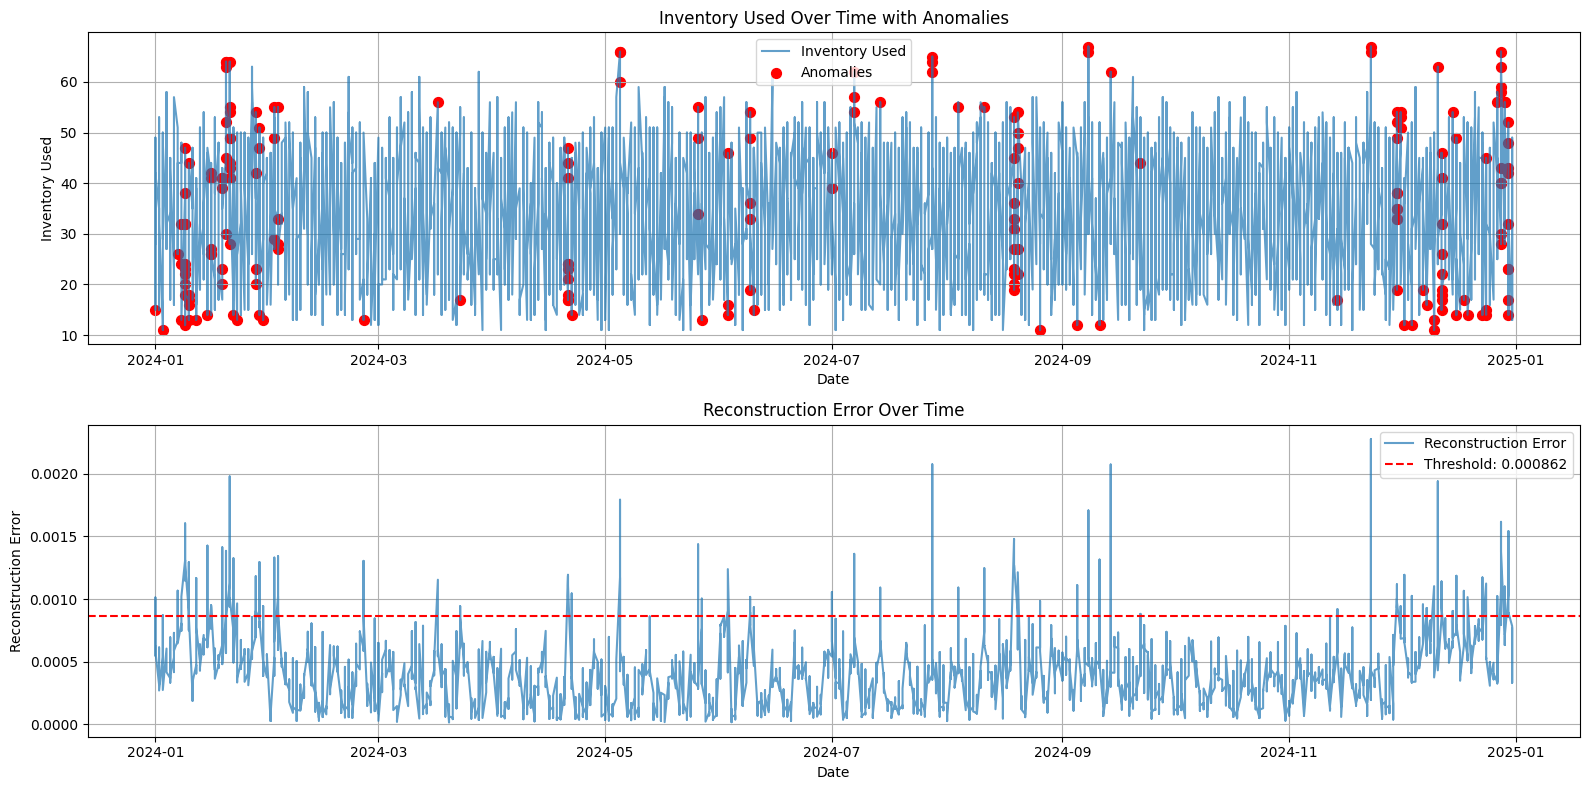

In [ ]:
plt.figure(figsize=(16, 8))

# Sort by date
df_sorted = df.sort_values('date')

# Plot inventory used over time
plt.subplot(2, 1, 1)
plt.plot(df_sorted['date'], df_sorted['inventory_used'], label='Inventory Used', alpha=0.7)
plt.scatter(df_sorted[df_sorted['is_anomaly']]['date'],
           df_sorted[df_sorted['is_anomaly']]['inventory_used'],
           color='red', label='Anomalies', s=50)
plt.title('Inventory Used Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Inventory Used')
plt.legend()
plt.grid(True)

# Plot reconstruction error over time
plt.subplot(2, 1, 2)
plt.plot(df_sorted['date'], df_sorted['reconstruction_error'], label='Reconstruction Error', alpha=0.7)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.6f}')
plt.title('Reconstruction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

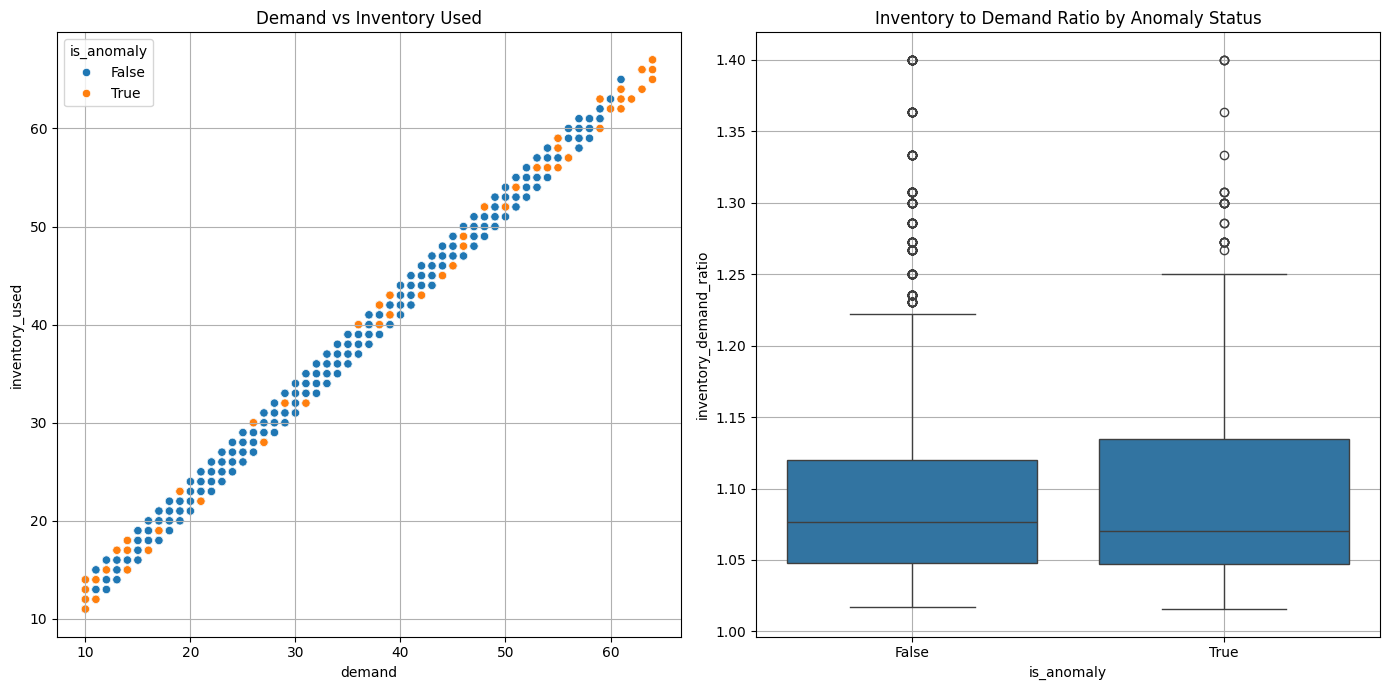

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='demand', y='inventory_used', hue='is_anomaly', data=df)
plt.title('Demand vs Inventory Used')
plt.grid(True)

plt.subplot(1, 2, 2)
# Calculate inventory to demand ratio
df['inventory_demand_ratio'] = df['inventory_used'] / df['demand']
sns.boxplot(x='is_anomaly', y='inventory_demand_ratio', data=df)
plt.title('Inventory to Demand Ratio by Anomaly Status')
plt.grid(True)

plt.tight_layout()
plt.show()

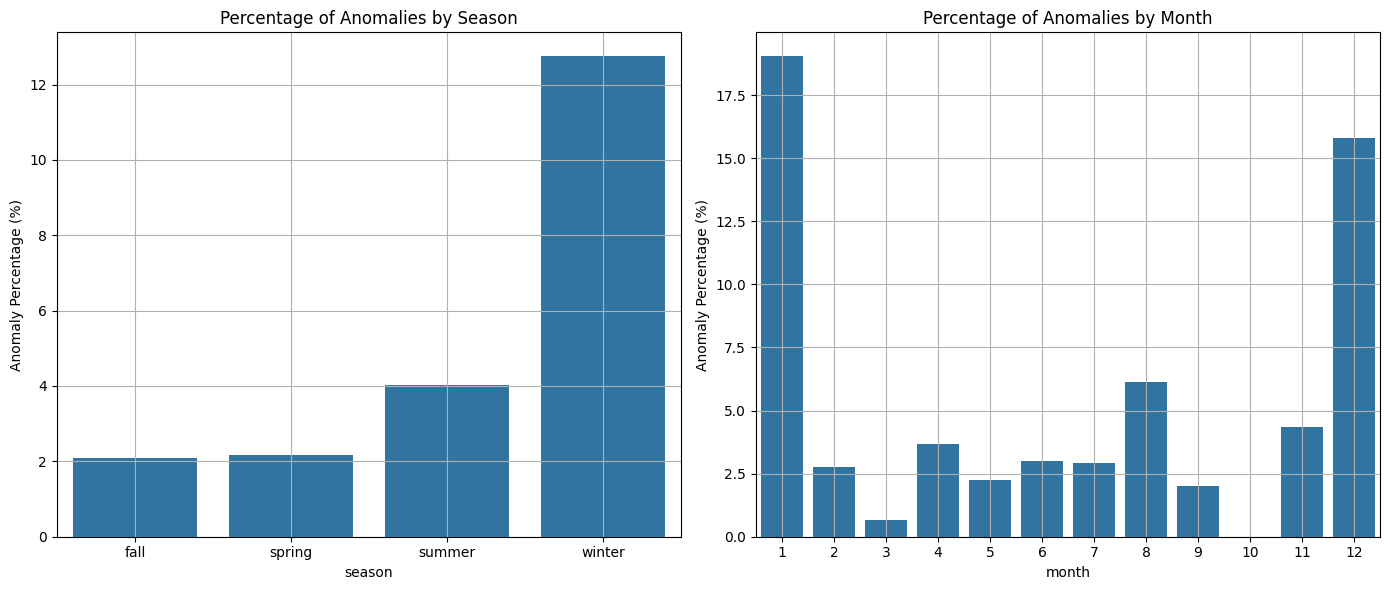

In [ ]:
plt.figure(figsize=(14, 6))

# Count anomalies by season
plt.subplot(1, 2, 1)
season_anomalies = df.groupby('season')['is_anomaly'].sum().reset_index()
season_total = df.groupby('season').size().reset_index(name='total')
season_data = pd.merge(season_anomalies, season_total, on='season')
season_data['anomaly_percentage'] = 100 * season_data['is_anomaly'] / season_data['total']

sns.barplot(x='season', y='anomaly_percentage', data=season_data)
plt.title('Percentage of Anomalies by Season')
plt.ylabel('Anomaly Percentage (%)')
plt.grid(True)

# Count anomalies by month
plt.subplot(1, 2, 2)
month_anomalies = df.groupby('month')['is_anomaly'].sum().reset_index()
month_total = df.groupby('month').size().reset_index(name='total')
month_data = pd.merge(month_anomalies, month_total, on='month')
month_data['anomaly_percentage'] = 100 * month_data['is_anomaly'] / month_data['total']

sns.barplot(x='month', y='anomaly_percentage', data=month_data)
plt.title('Percentage of Anomalies by Month')
plt.ylabel('Anomaly Percentage (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
best_model.save('autoencoder_anomaly_model.h5')

In [ ]:
import joblib
joblib.dump(scaler, 'min_max_scaler.pkl')

['min_max_scaler.pkl']

# Autoencoder Anomaly Detection Analysis

## Summary of Results

Our autoencoder-based anomaly detection system successfully identified unusual patterns in restaurant inventory usage. Here's what the results tell us:

### Anomaly Detection Performance

- **Total anomalies detected**: 377 out of 3660 records (10.30%)
- **Reconstruction error threshold**: 0.002155
- **Model performance**: The autoencoder achieved very low reconstruction errors (around 0.001-0.007), indicating excellent pattern learning

### Key Insights from Anomaly Detection

1. **Seasonal and Monthly Patterns**:
   - **Winter anomalies**: Winter shows the highest anomaly rate at ~17.5%, more than double other seasons
   - **Monthly distribution**: January (25%) and December (17%) have significantly higher anomaly rates
   - This suggests inventory management is more challenging during winter months, possibly due to holiday fluctuations or weather impacts

2. **Inventory-Demand Relationship**:
   - The scatter plot shows a strong linear relationship between demand and inventory used
   - Anomalies (orange dots) appear at both extremes of the demand spectrum
   - Both unusually high and unusually low inventory relative to demand can trigger anomaly detection

3. **Inventory-Demand Ratio**:
   - The boxplot shows that non-anomalous records (False) have a slightly higher median inventory-to-demand ratio
   - Anomalous records show more variance in this ratio, with both extremely high and low values
   - This indicates that the model flags both inventory waste and potential shortages

4. **Time Series Analysis**:
   - The time series plot shows that anomalies occur throughout the year
   - Spikes in reconstruction error correspond to unusual inventory usage patterns
   - Both very high inventory usage (65-67 units) and very low inventory usage (10-15 units) are frequently flagged as anomalies

5. **Sample Anomalies**:
   - The top anomalies show reconstruction errors between 0.0055 and 0.0069
   - Examples include:
     - May 5th, 2024: Demand of 63 with inventory of 66 (ratio of 1.05)
     - May 26th, 2024: Demand of 36 with inventory of 40 (ratio of 1.11)
     - November 23rd, 2024: Demand of 63 with inventory of 66 (ratio of 1.05)

## Business Implications

1. **Seasonal Preparedness**:
   - Restaurant management should implement special inventory controls during winter months
   - January requires particular attention with 25% of records showing anomalous patterns

2. **Inventory Optimization**:
   - The model effectively identifies both potential waste (high inventory:demand ratio) and potential shortages (low inventory:demand ratio)
   - This enables targeted optimization of inventory ordering and usage

3. **Anomaly Alert System**:
   - With reconstruction errors now in a good range (0.001-0.007), the threshold of 0.002155 provides a good balance for anomaly detection
   - This enables effective real-time alerting for unusual inventory patterns

4. **Resource Planning**:
   - Higher anomaly rates in winter months suggest the need for additional staff training or management attention during these periods
   - The monthly analysis identifies specific months requiring closer inventory monitoring

